<a href="https://colab.research.google.com/github/chehansivaruban/Cyber---SDGP/blob/main/LSTM_final1_0.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [10]:
df = pd.read_csv(
  "dateindex1.csv", 
  parse_dates=['datetime'], 
  index_col="datetime"
)

In [11]:
df.shape

(105191, 1)

In [12]:
df.head()

,G
datetime,
2005-01-01 00:00:00,0.0
2005-01-01 01:00:00,55.0
2005-01-01 02:00:00,41.0
2005-01-01 03:00:00,203.0
2005-01-01 04:00:00,421.0


In [19]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df.head

<bound method NDFrame.head of                          G  hour  day_of_month  day_of_week  month
datetime                                                          
2005-01-01 00:00:00    0.0     0             1            5      1
2005-01-01 01:00:00   55.0     1             1            5      1
2005-01-01 02:00:00   41.0     2             1            5      1
2005-01-01 03:00:00  203.0     3             1            5      1
2005-01-01 04:00:00  421.0     4             1            5      1
...                    ...   ...           ...          ...    ...
2016-12-31 18:00:00    0.0    18            31            5     12
2016-12-31 19:00:00    0.0    19            31            5     12
2016-12-31 20:00:00    0.0    20            31            5     12
2016-12-31 21:00:00    0.0    21            31            5     12
2016-12-31 22:00:00    0.0    22            31            5     12

[105191 rows x 5 columns]>

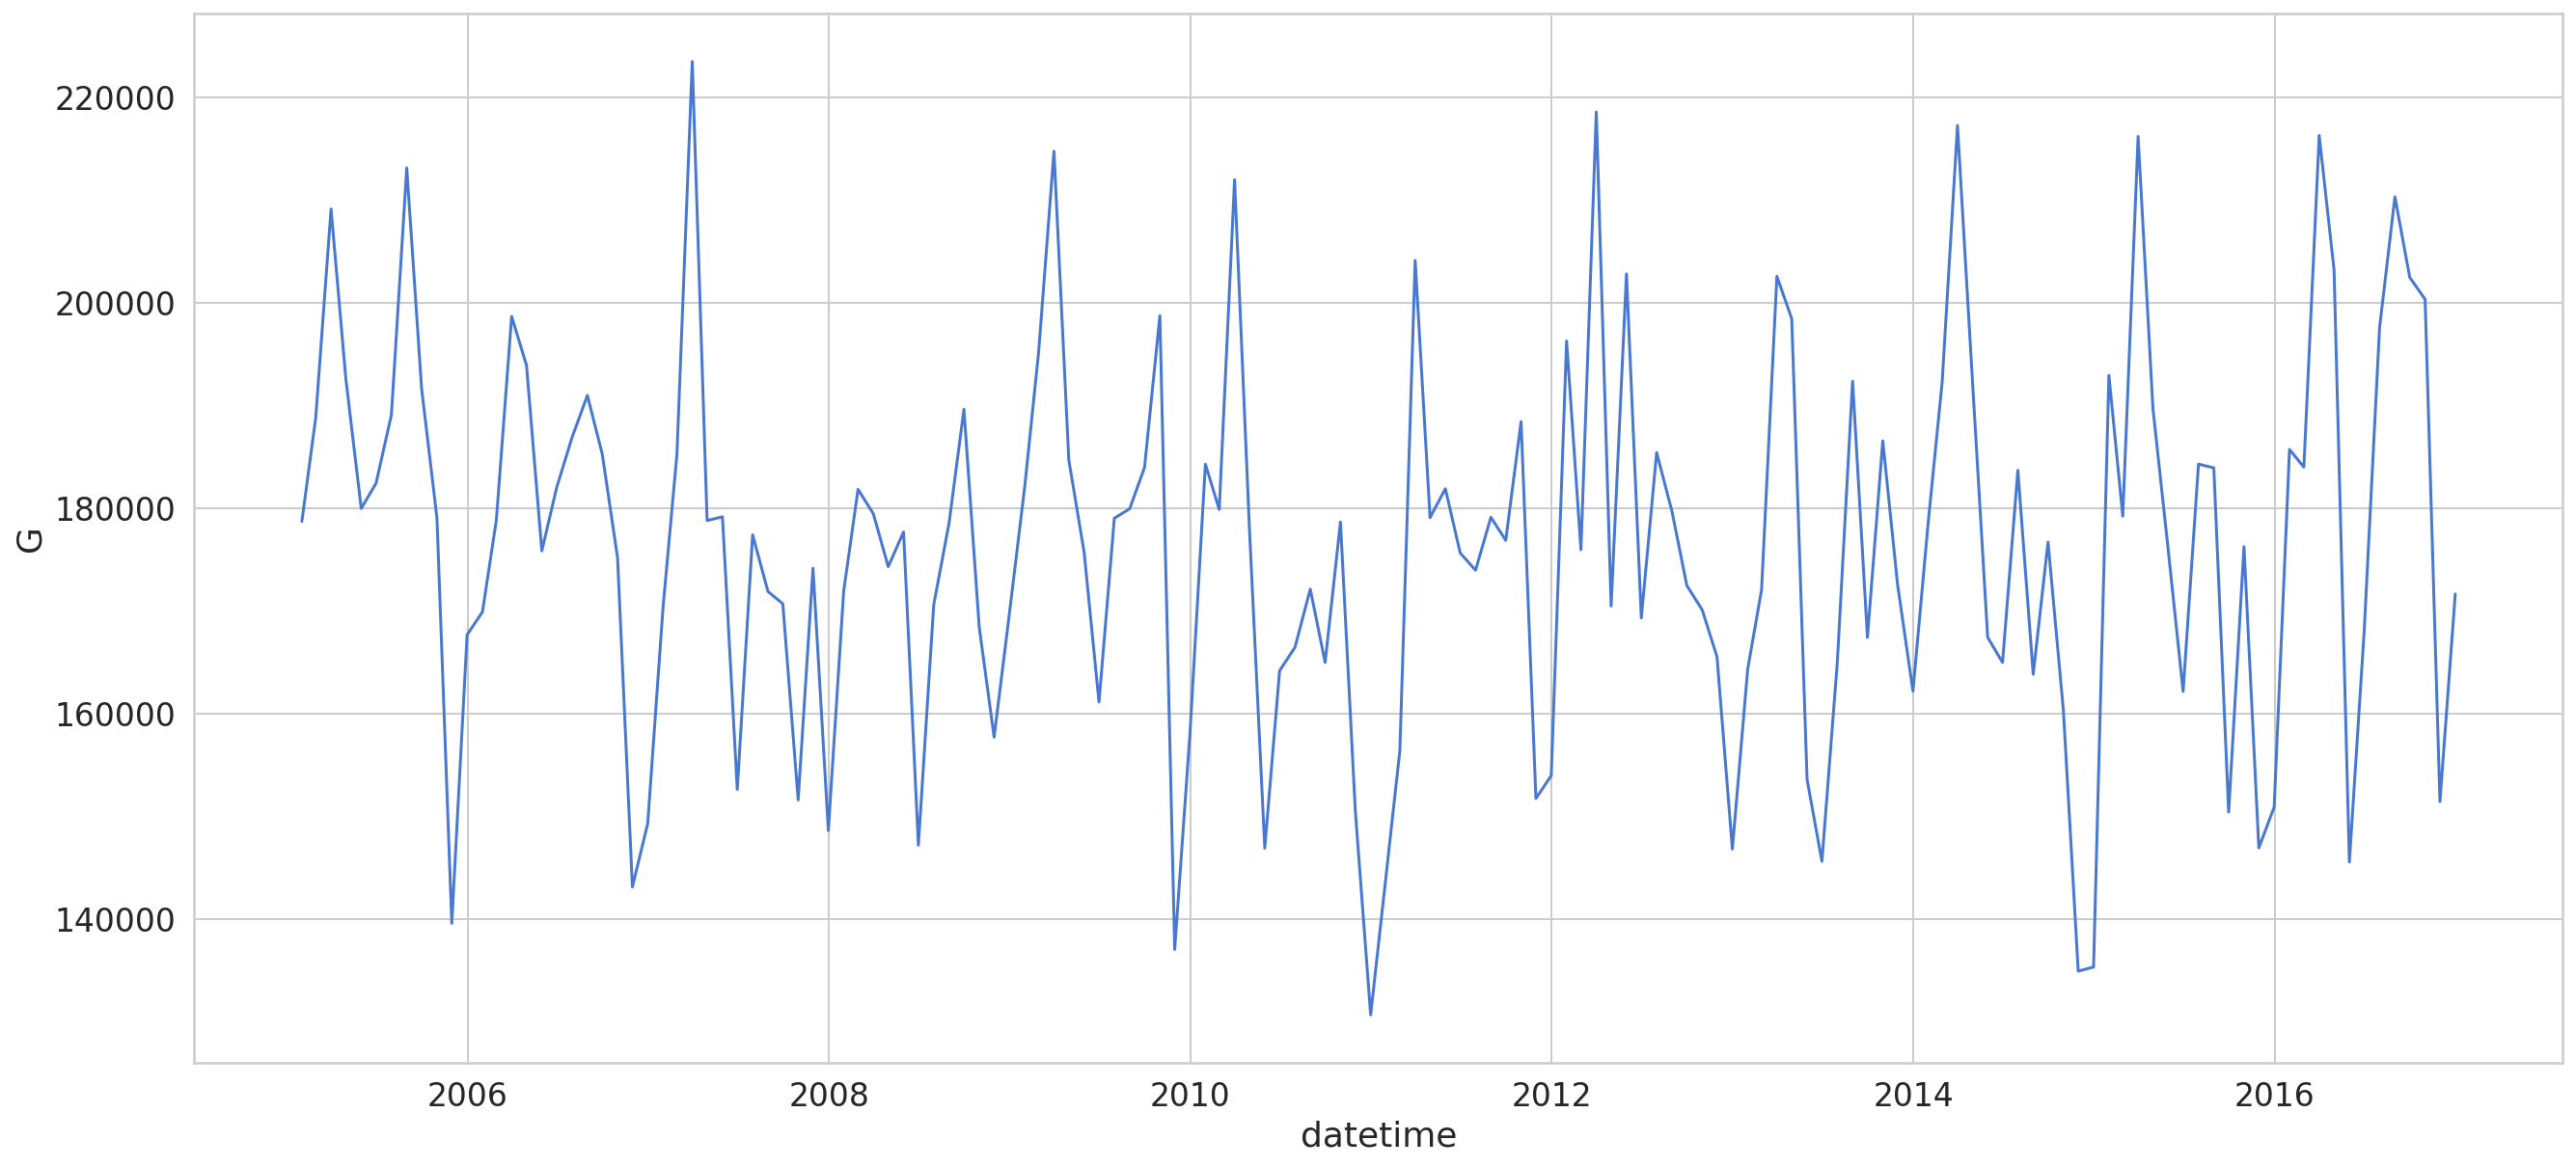

In [15]:
df_by_month = df.resample('M').sum()

sns.lineplot(x=df_by_month.index, y="G", data=df_by_month);

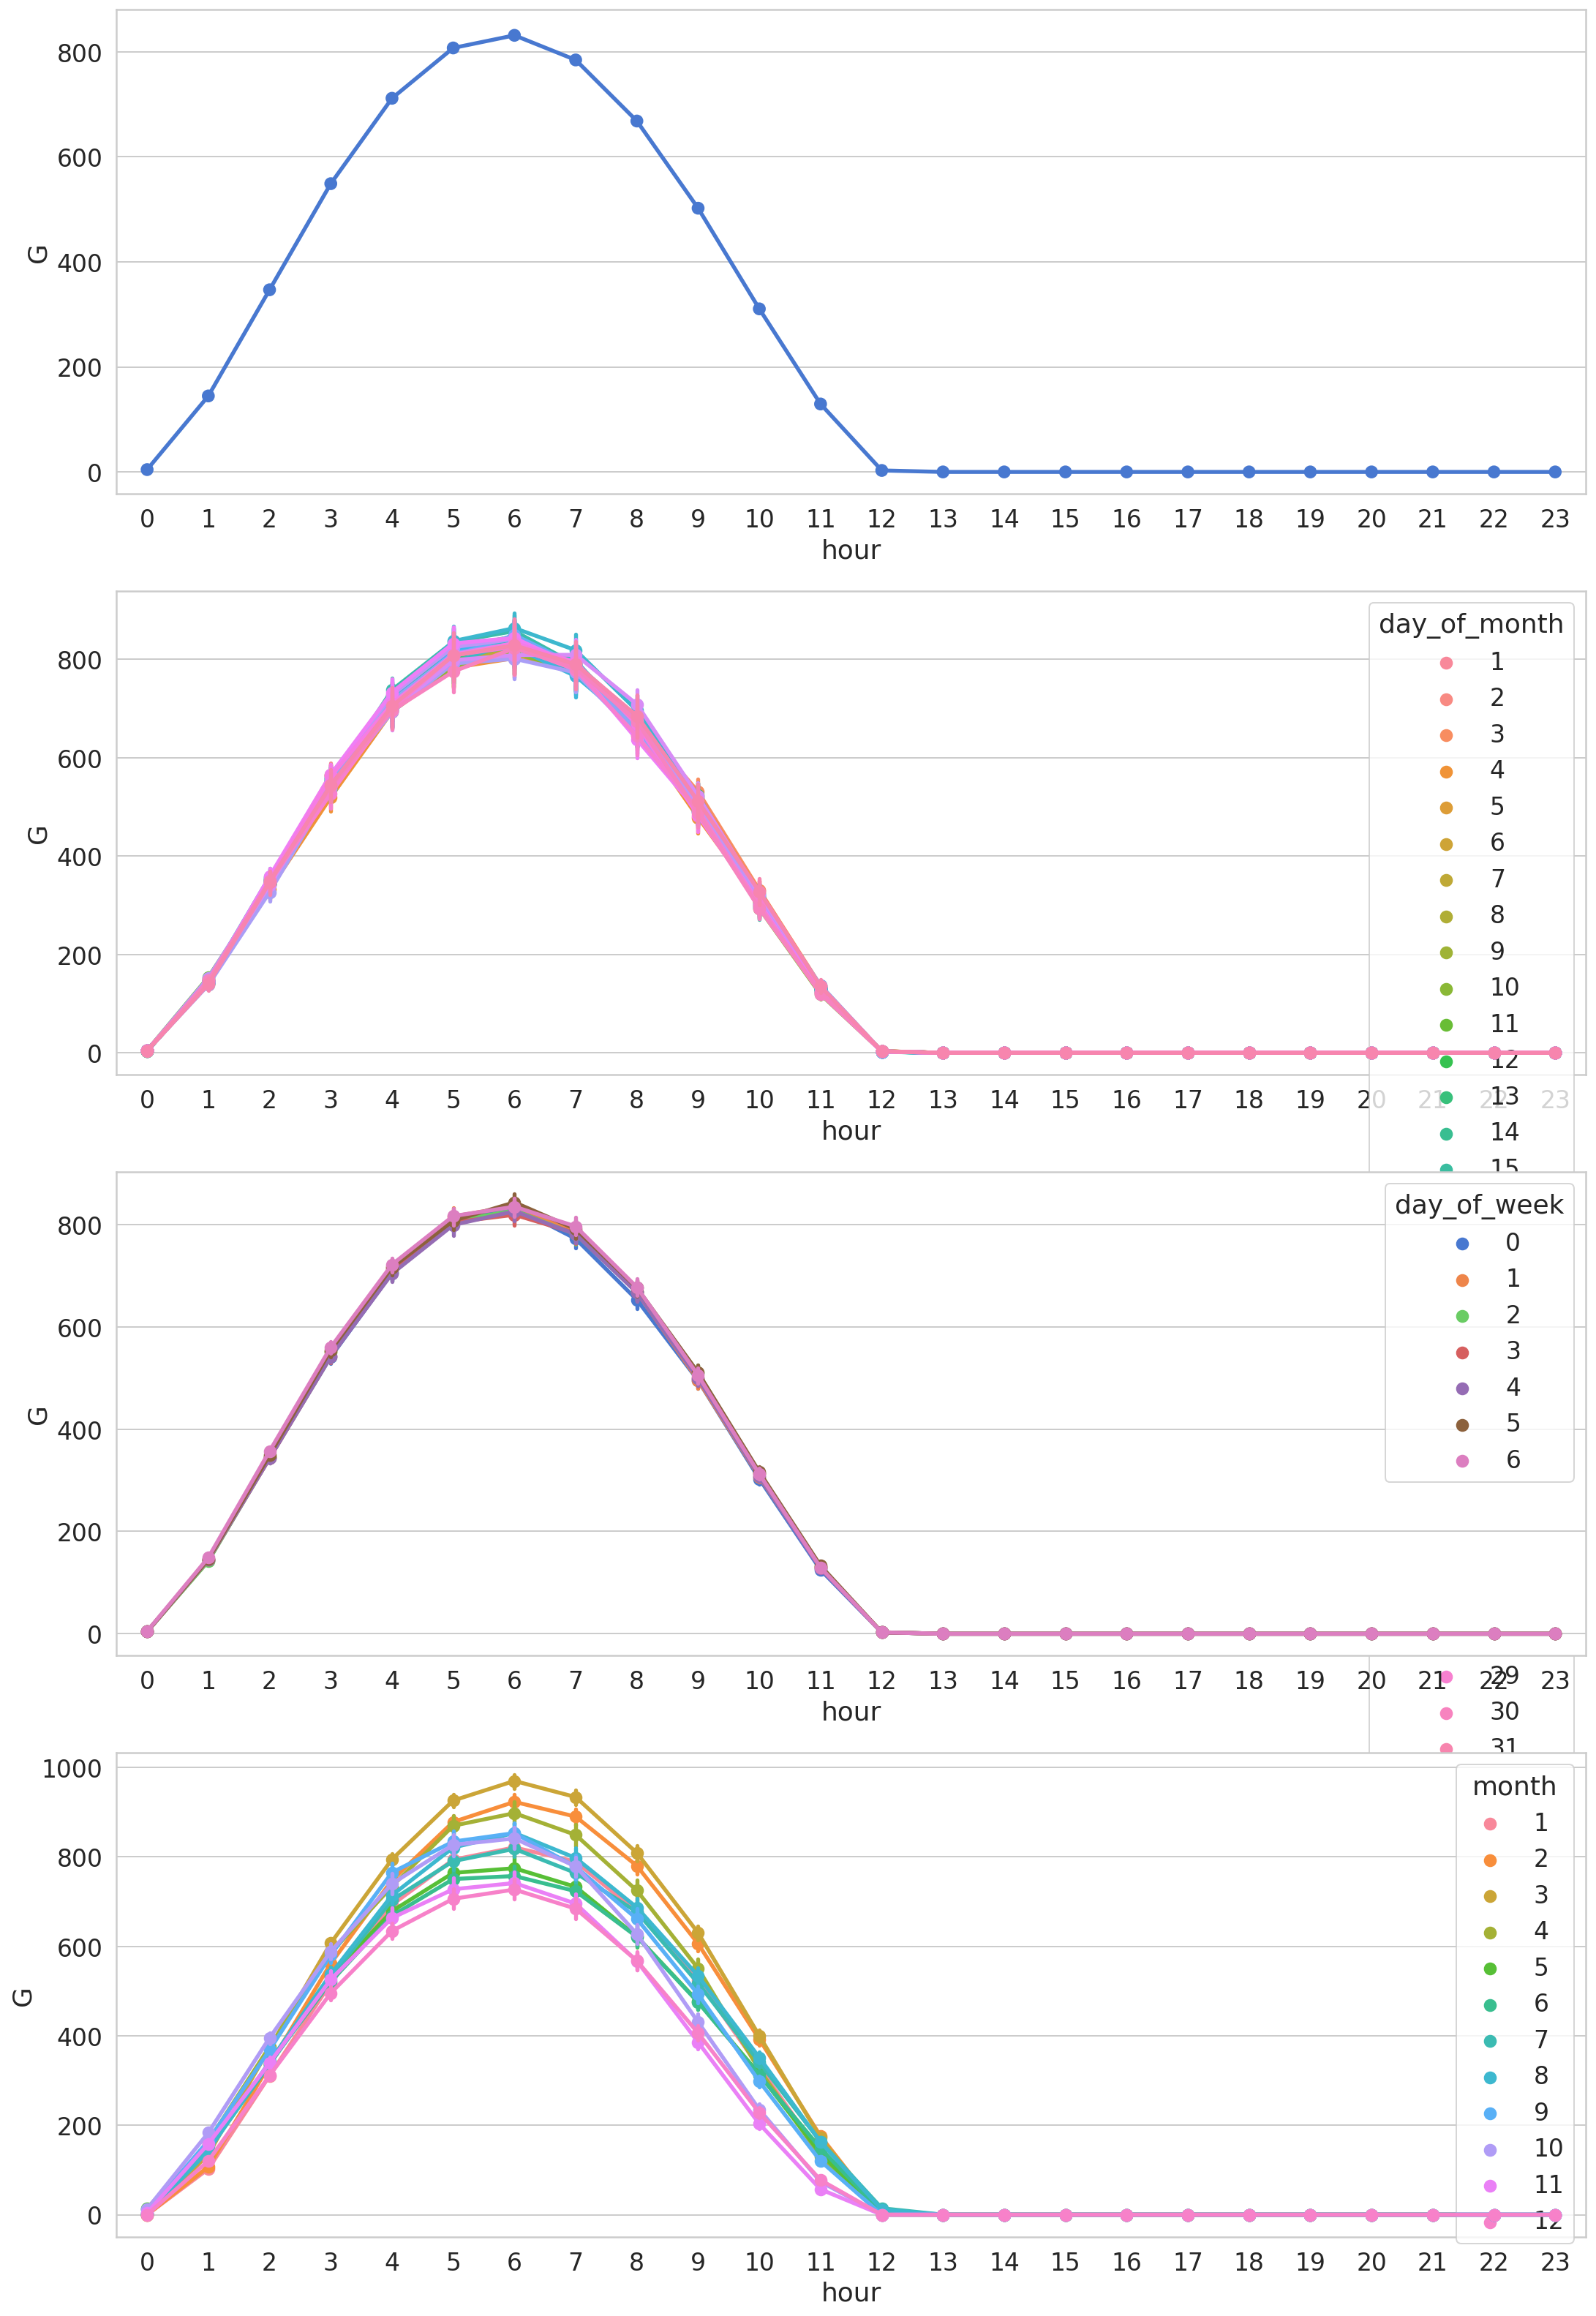

In [16]:
fig,(ax1, ax2, ax3, ax4)= plt.subplots(nrows=4)
fig.set_size_inches(18, 28)

sns.pointplot(data=df, x='hour', y='G', ax=ax1)
sns.pointplot(data=df, x='hour', y='G', hue='day_of_month', ax=ax2)
sns.pointplot(data=df, x='hour', y='G', hue='day_of_week', ax=ax3)
sns.pointplot(data=df, x='hour', y='G', hue='month', ax=ax4);

In [17]:
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

73633 31558


In [9]:
#preprocessing the data to maximize efficiency

from sklearn.preprocessing import RobustScaler

gi_transformer = RobustScaler() #G(i)

gi_transformer = gi_transformer.fit(train[['G']])

train['G'] = gi_transformer.transform(train[['G']])

test['G'] = gi_transformer.transform(test[['G']])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [4]:
#numphy array
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [18]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.G, time_steps)
X_test, y_test = create_dataset(test, test.G, time_steps)

print(X_train.shape, y_train.shape)

(73609, 24, 5) (73609,)


In [12]:
time_steps

24

In [2]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

NameError: ignored

In [14]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
2071/2071 [==============================] - 84s 39ms/step - loss: 0.1245 - val_loss: 0.0333
Epoch 2/30
2071/2071 [==============================] - 80s 38ms/step - loss: 0.0322 - val_loss: 0.0323
Epoch 3/30
2071/2071 [==============================] - 79s 38ms/step - loss: 0.0285 - val_loss: 0.0316
Epoch 4/30
2071/2071 [==============================] - 80s 38ms/step - loss: 0.0273 - val_loss: 0.0311
Epoch 5/30
2071/2071 [==============================] - 79s 38ms/step - loss: 0.0265 - val_loss: 0.0312
Epoch 6/30
2071/2071 [==============================] - 79s 38ms/step - loss: 0.0260 - val_loss: 0.0311
Epoch 7/30
2071/2071 [==============================] - 79s 38ms/step - loss: 0.0258 - val_loss: 0.0302
Epoch 8/30
2071/2071 [==============================] - 79s 38ms/step - loss: 0.0254 - val_loss: 0.0302
Epoch 9/30
2071/2071 [==============================] - 79s 38ms/step - loss: 0.0250 - val_loss: 0.0305
Epoch 10/30
2071/2071 [==============================] - 79s 38m

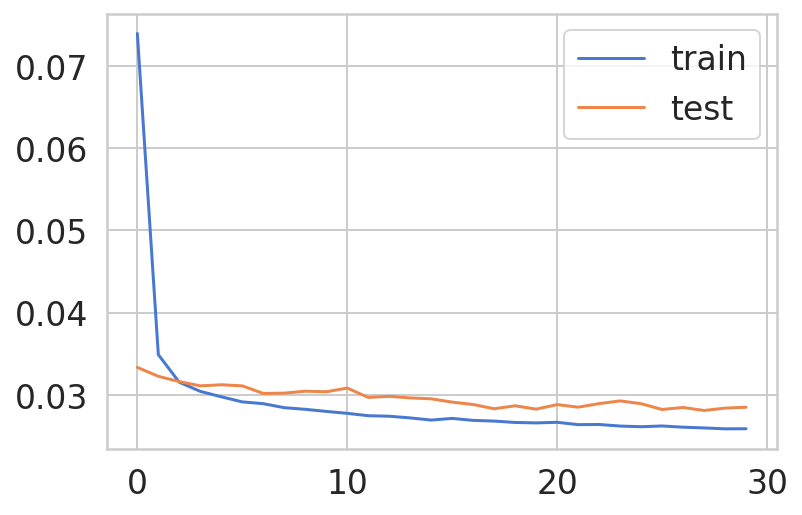

In [15]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [16]:
# Recreate the exact same model
#model = keras.models.load_model('my_model.h5')
#model.summary()

OSError: ignored

In [17]:
y_pred = model.predict(X_test)

In [18]:
print(X_test.shape)

(31534, 24, 5)


In [19]:
y_train_inv = gi_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = gi_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = gi_transformer.inverse_transform(y_pred)

In [20]:
print(y_pred_inv)

[[164.11757  ]
 [437.6817   ]
 [581.682    ]
 ...
 [ -3.0354898]
 [ -3.3122122]
 [ -6.722545 ]]


In [21]:
print(y_pred_inv[0])

[164.11757]


In [22]:
print(y_pred.shape)

(31534, 1)


In [24]:
X_test_inv =  gi_transformer.inverse_transform(X_test.reshape(1, -1))

In [25]:
print(X_test_inv[0])

[  211.   469. 12663. ... 14539.  2345.  5628.]


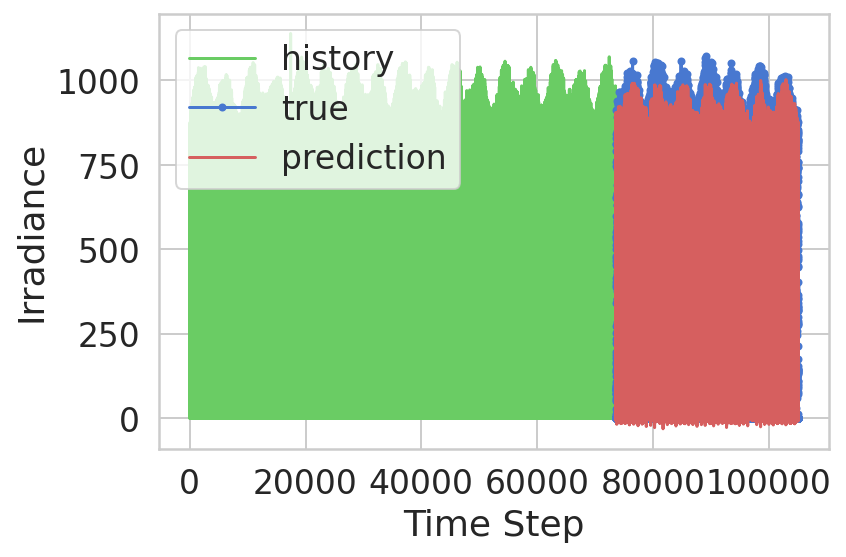

In [30]:

plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Irradiance')
plt.xlabel('Time Step')
plt.legend()
plt.show();

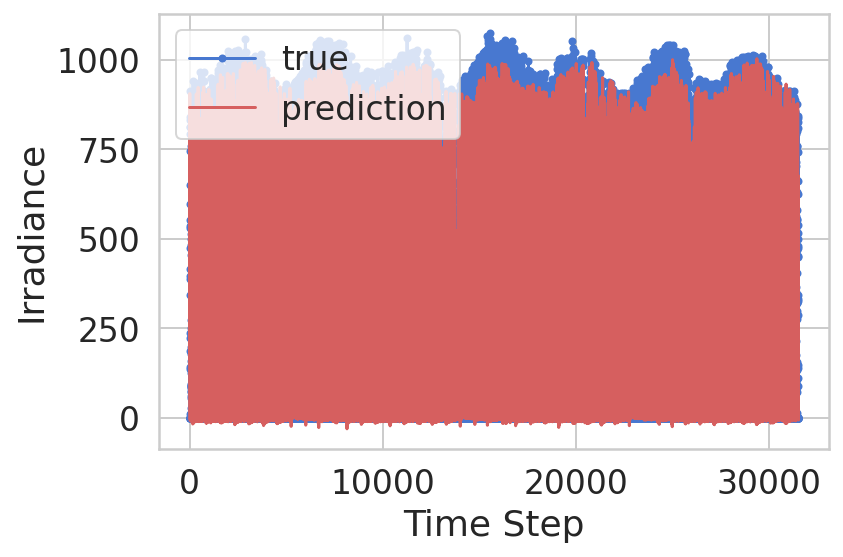

In [27]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Irradiance')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [1]:
# Save entire model to a HDF5 file
model.save('my_model.h5')

NameError: ignored

In [29]:
# Recreate the exact same model, including weights and optimizer.
new_model = keras.models.load_model('my_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 256)               137216    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 137,473
Trainable params: 137,473
Non-trainable params: 0
_________________________________________________________________
